In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("travel_dataset.csv")

In [3]:
df.shape

(4888, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
columns = [col.strip().lower() for col in df.columns]

In [7]:
df.columns = columns

In [8]:
df.columns

Index(['customerid', 'prodtaken', 'age', 'typeofcontact', 'citytier',
       'durationofpitch', 'occupation', 'gender', 'numberofpersonvisiting',
       'numberoffollowups', 'productpitched', 'preferredpropertystar',
       'maritalstatus', 'numberoftrips', 'passport', 'pitchsatisfactionscore',
       'owncar', 'numberofchildrenvisiting', 'designation', 'monthlyincome'],
      dtype='object')

In [9]:
df["gender"] = df["gender"].str.replace("M", "m").str.replace(" ", "")

In [10]:
df["gender"].value_counts()

gender
male      2916
Female    1972
Name: count, dtype: int64

In [11]:
df["prodtaken"].value_counts()

prodtaken
0    3968
1     920
Name: count, dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.shape

(4128, 20)

In [15]:
df.isnull().sum()

customerid                  0
prodtaken                   0
age                         0
typeofcontact               0
citytier                    0
durationofpitch             0
occupation                  0
gender                      0
numberofpersonvisiting      0
numberoffollowups           0
productpitched              0
preferredpropertystar       0
maritalstatus               0
numberoftrips               0
passport                    0
pitchsatisfactionscore      0
owncar                      0
numberofchildrenvisiting    0
designation                 0
monthlyincome               0
dtype: int64

Text(0.5, 1500, 'Product taken')

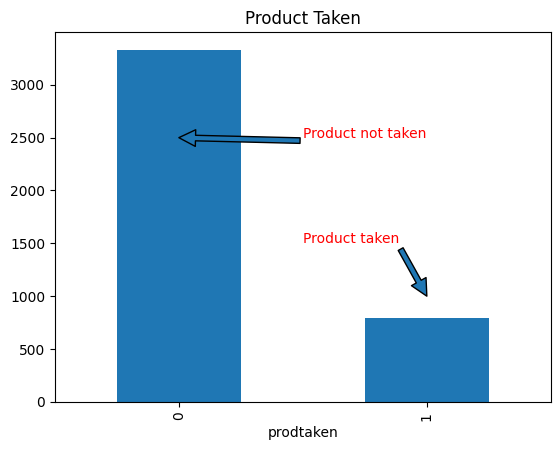

In [19]:
plt.title("Product Taken")
df["prodtaken"].value_counts().plot(kind="bar")
plt.annotate('Product not taken', xytext=(0.5,2500), color='red', 
             xy=(0,2500), arrowprops={} )
plt.annotate('Product taken', xytext=(0.5,1500), color='red', 
             xy=(1,1000), arrowprops={} )

Text(2, 1500, 'most_preferred_prod')

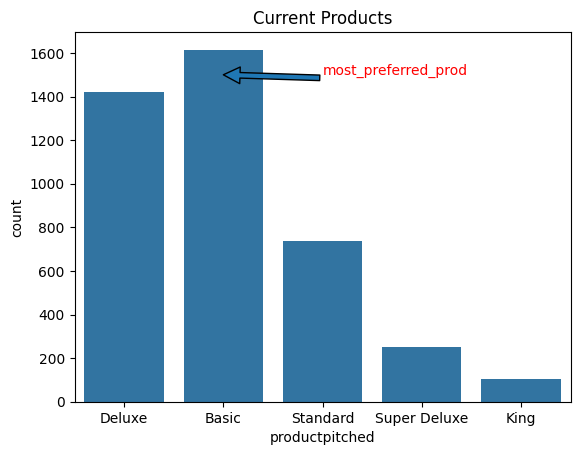

In [24]:
plt.title("Current Products")
sns.countplot(data=df, x='productpitched')
plt.annotate('most_preferred_prod', xytext=(2,1500), color='red', 
             xy=(1,1500), arrowprops={} )

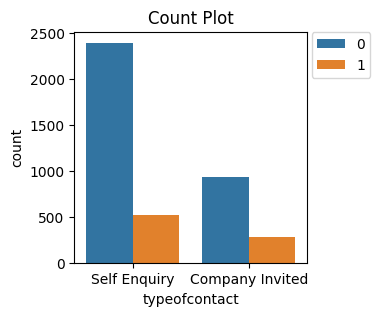

In [33]:
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title("Count Plot")
sns.countplot(data=df, x='typeofcontact', hue='prodtaken', ax=ax)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

<Axes: ylabel='Frequency'>

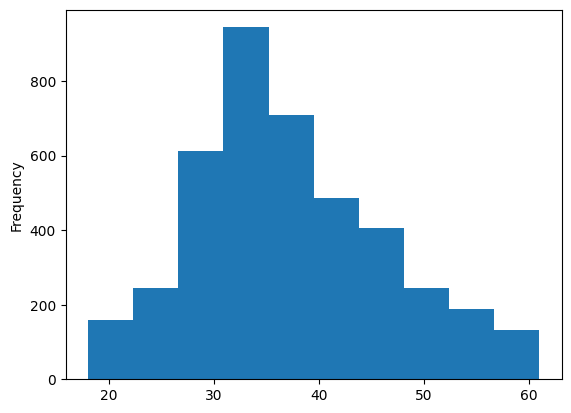

In [15]:
df["age"].plot(kind="hist")

In [21]:
df['agebin'] = pd.cut(df['age'], bins = [18,25, 31, 40, 50, 65], labels = ['18-25','26-33', '33-40', '41-57', '58-65'])

In [22]:
df["agebin"].value_counts()

agebin
33-40    1588
41-57     900
26-33     891
58-65     435
18-25     300
Name: count, dtype: int64

Text(1, 1300, 'can you observe? 😱')

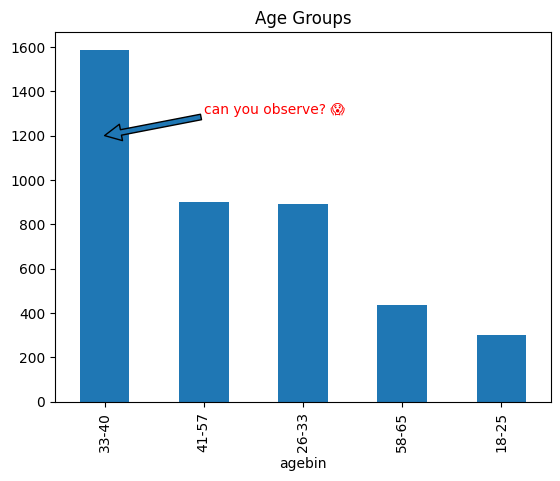

In [23]:
plt.title("Age Groups")
df["agebin"].value_counts().plot(kind="bar")
plt.annotate('can you observe? 😱', xytext=(1,1300), color='red', 
             xy=(0,1200), arrowprops={} )

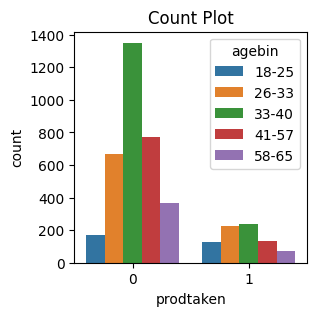

In [25]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Count Plot")
sns.countplot(data=df, x='prodtaken', hue='agebin', ax=ax)

plt.show()


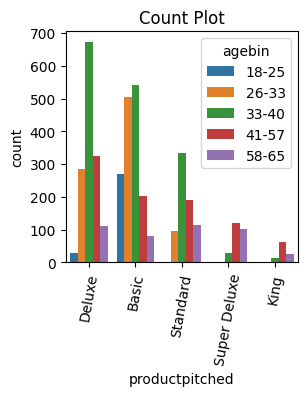

In [26]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Count Plot")
sns.countplot(data=df, x='productpitched', hue='agebin', ax=ax)
plt.xticks(rotation=80)
plt.show()

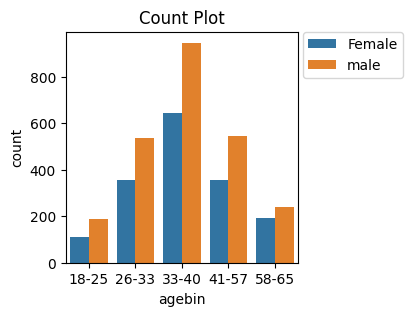

In [28]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Count Plot")
sns.countplot(data=df, x='agebin', hue='gender', ax=ax)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

C:\Users\laxmi\anaconda3\envs\Datascience\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


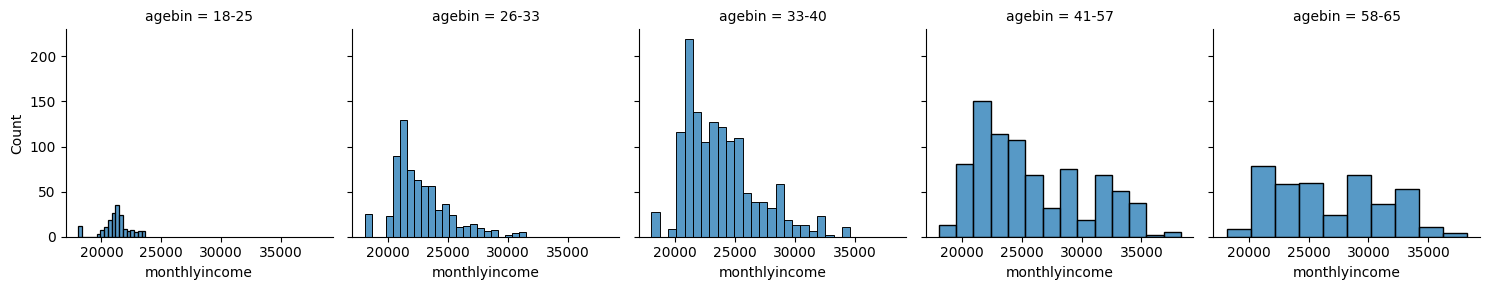

In [51]:
grid = sns.FacetGrid(df, col="agebin")
grid.map(sns.histplot, "monthlyincome")

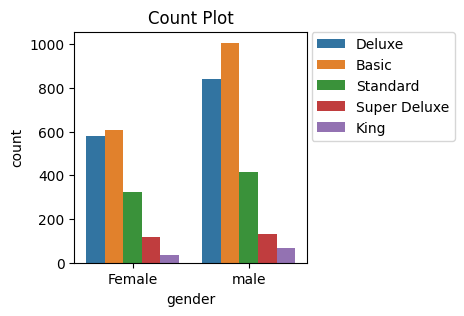

In [27]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Count Plot")
sns.countplot(data=df, x='gender', hue='productpitched', ax=ax)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

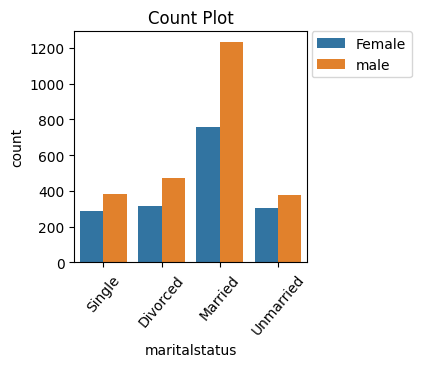

In [29]:

fig, ax = plt.subplots(figsize=(3,3))
ax.set_title("Count Plot")
sns.countplot(data=df, x='maritalstatus', hue='gender', ax=ax)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=50)
plt.show()

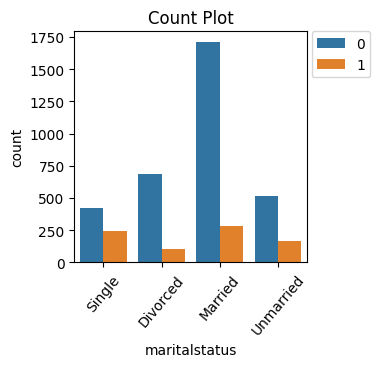

In [30]:
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title("Count Plot")
sns.countplot(data=df, x='maritalstatus', hue='prodtaken', ax=ax)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=50)
plt.show()

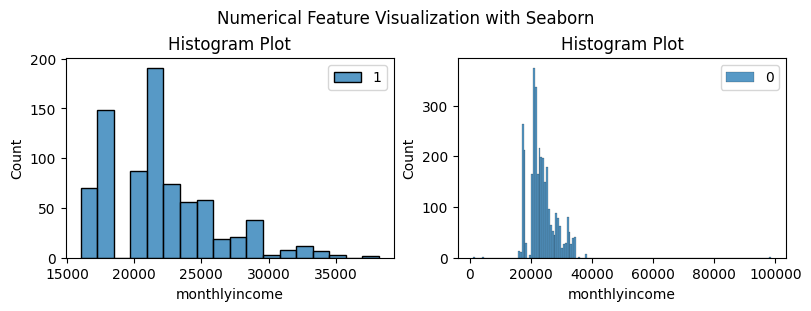

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['prodtaken']== 1], x='monthlyincome', ax=axs[0], label="1")
axs[0].legend()

axs[1].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['prodtaken']==0], x='monthlyincome', ax=axs[1], label="0")
axs[1].legend()

plt.show()

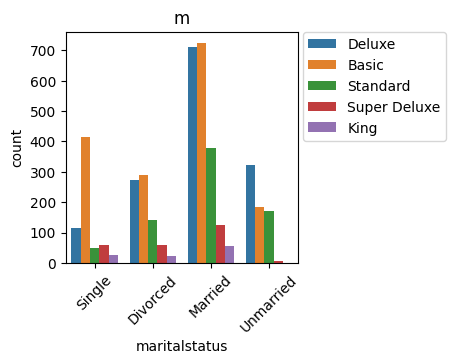

In [35]:
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title("m")
sns.countplot(data=df, x='maritalstatus', hue='productpitched', ax=ax)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45)
plt.show()

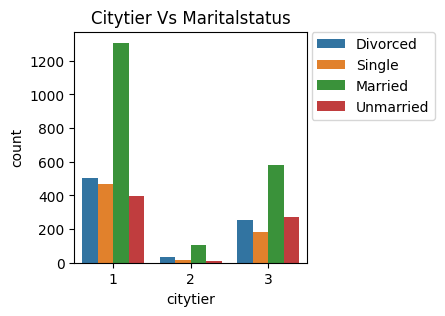

In [37]:
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title("Citytier Vs Maritalstatus")
sns.countplot(data=df, x='citytier', hue='maritalstatus', ax=ax)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

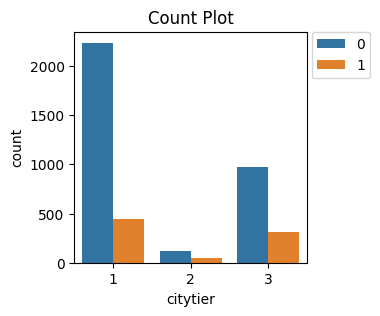

In [38]:
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title("Count Plot")
sns.countplot(data=df, x='citytier', hue='prodtaken', ax=ax)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [40]:
df = df.loc[(df["monthlyincome"]<=40000) & (df["monthlyincome"] >=18000)]

<Axes: >

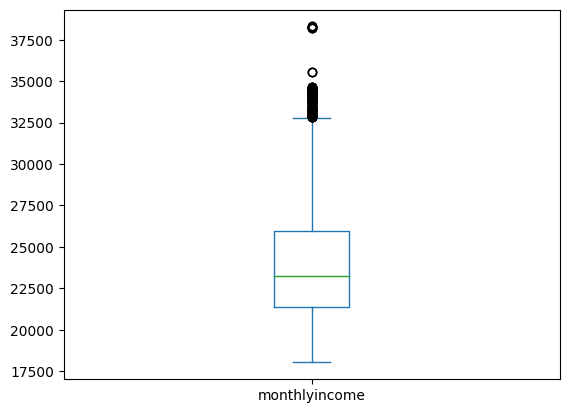

In [41]:
df["monthlyincome"].plot(kind="box")

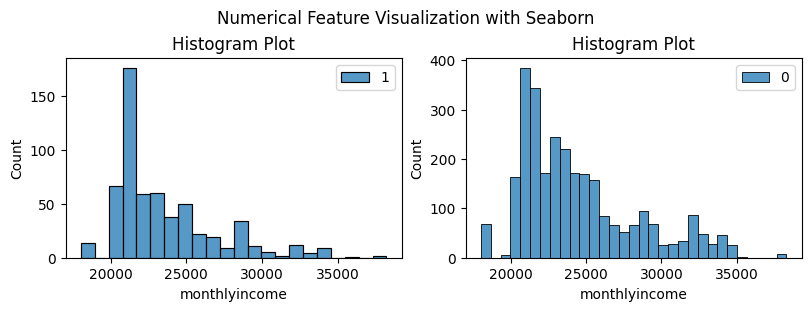

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['prodtaken']== 1], x='monthlyincome', ax=axs[0], label="1")
axs[0].legend()

axs[1].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['prodtaken']==0], x='monthlyincome', ax=axs[1], label="0")
axs[1].legend()

plt.show()

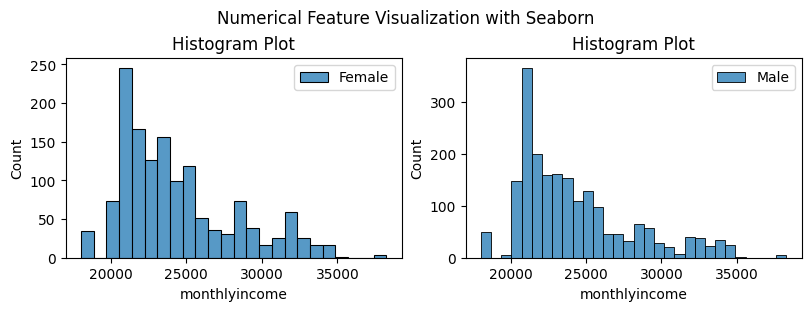

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['gender']== "Female"], x='monthlyincome', ax=axs[0], label="Female")
axs[0].legend()

axs[1].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['gender']=="male"], x='monthlyincome', ax=axs[1], label="Male")
axs[1].legend()

plt.show()

C:\Users\laxmi\anaconda3\envs\Datascience\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


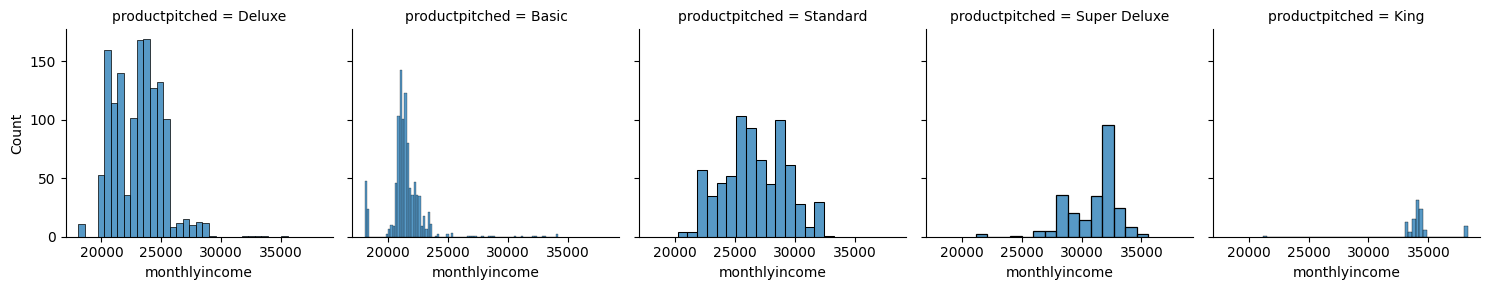

In [74]:
grid = sns.FacetGrid(df, col="productpitched")
grid.map(sns.histplot, "monthlyincome")

C:\Users\laxmi\anaconda3\envs\Datascience\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


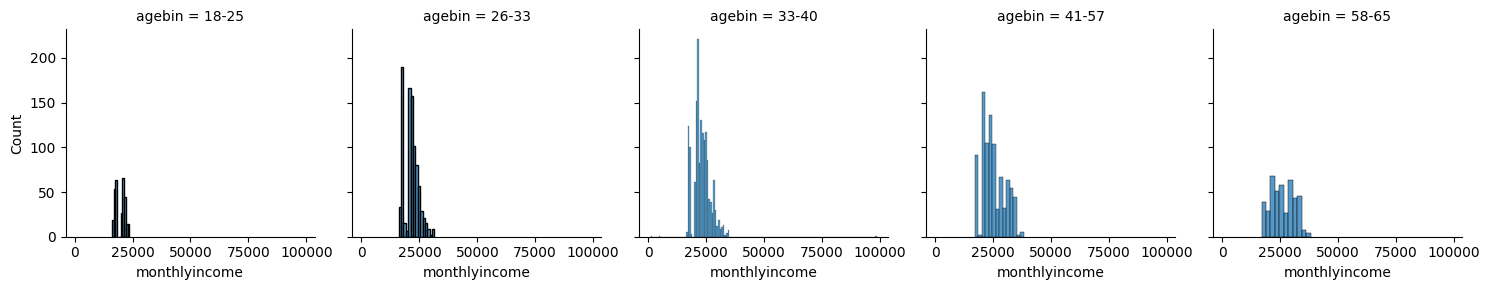

In [27]:
grid = sns.FacetGrid(df, col="agebin")
grid.map(sns.histplot, "monthlyincome")

In [53]:
df["numberoftrips"].describe()

count    3459.000000
mean        3.424111
std         1.851705
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        22.000000
Name: numberoftrips, dtype: float64

In [54]:
df["numberoftrips"].value_counts()

numberoftrips
3.0     959
2.0     926
4.0     374
5.0     339
1.0     331
6.0     262
7.0     162
8.0     103
21.0      1
20.0      1
22.0      1
Name: count, dtype: int64

<Axes: >

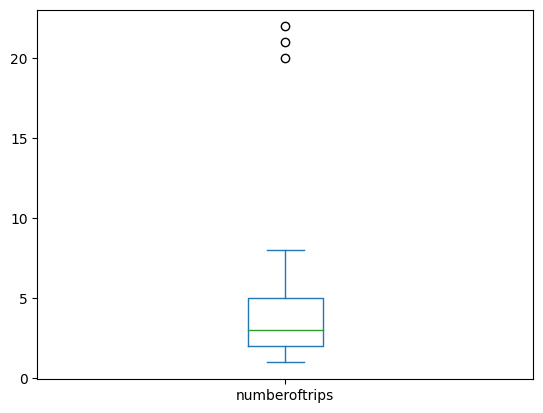

In [55]:
df["numberoftrips"].plot(kind="box")

In [56]:
df = df.loc[df["numberoftrips"] <=10]

<Axes: >

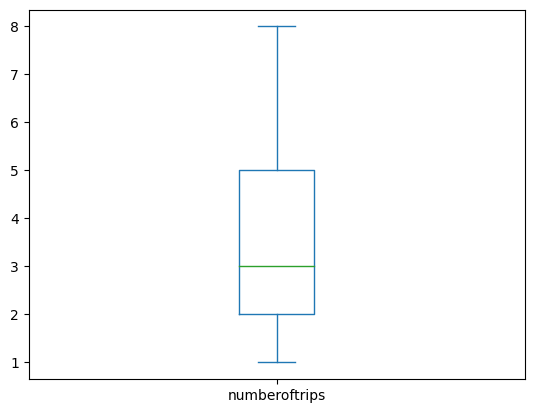

In [57]:
df["numberoftrips"].plot(kind="box")

C:\Users\laxmi\anaconda3\envs\Datascience\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


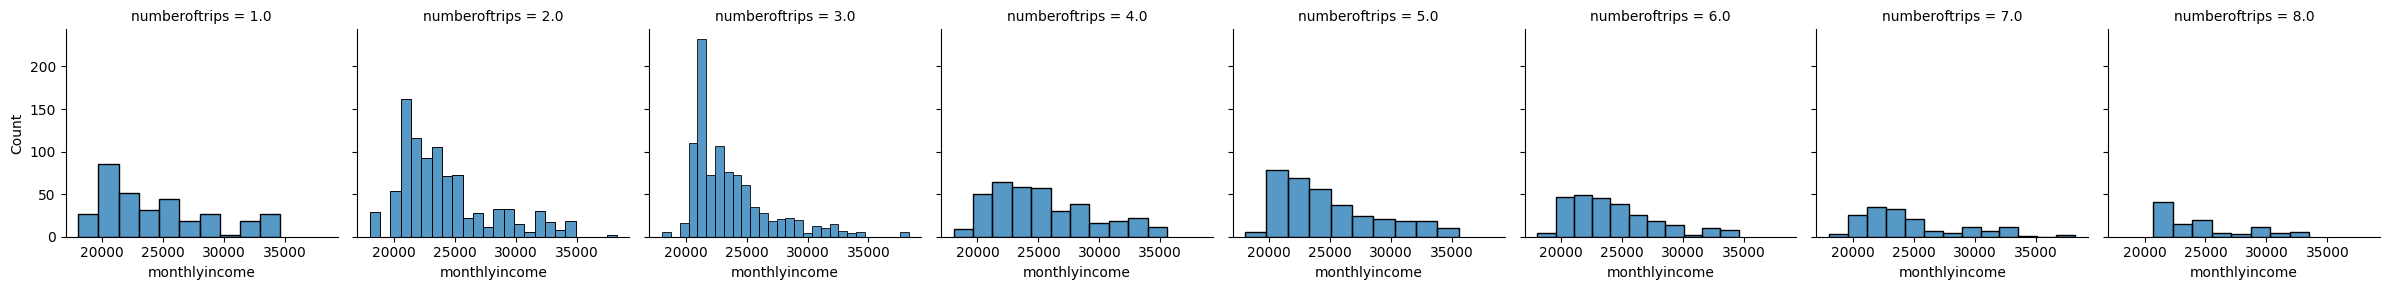

In [60]:
grid = sns.FacetGrid(df, col="numberoftrips")
grid.map(sns.histplot, "monthlyincome")

C:\Users\laxmi\anaconda3\envs\Datascience\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


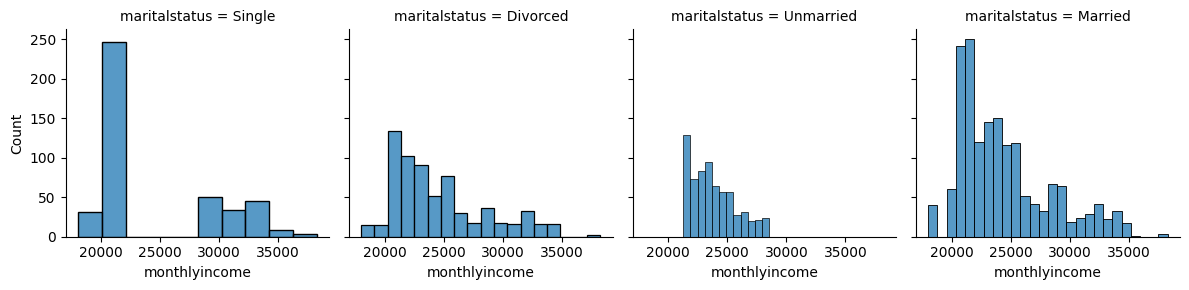

In [61]:
grid = sns.FacetGrid(df, col="maritalstatus")
grid.map(sns.histplot, "monthlyincome")

C:\Users\laxmi\anaconda3\envs\Datascience\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


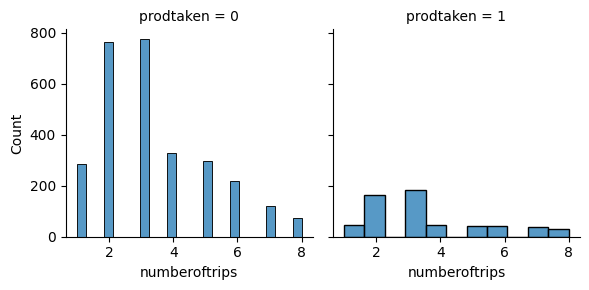

In [62]:
grid = sns.FacetGrid(df, col="prodtaken")
grid.map(sns.histplot, "numberoftrips")

C:\Users\laxmi\anaconda3\envs\Datascience\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


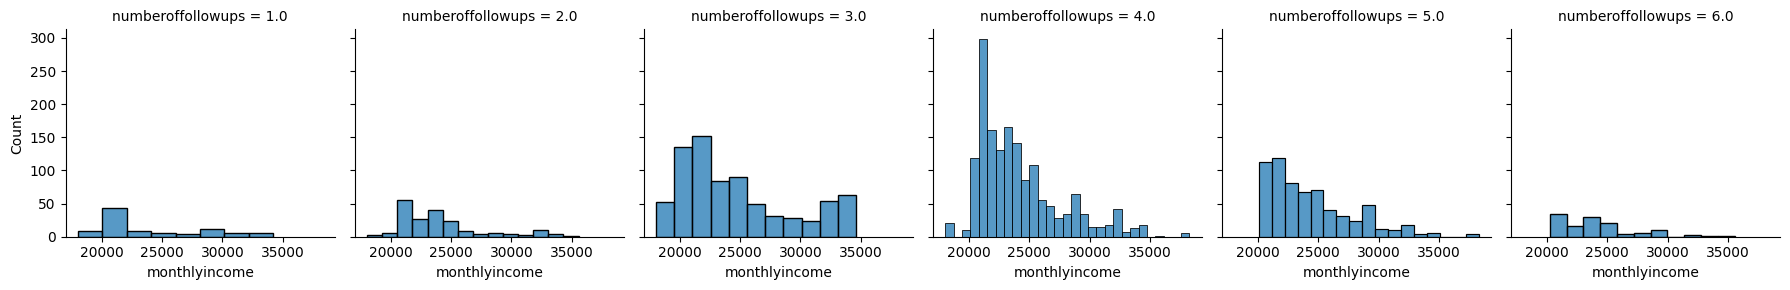

In [66]:
grid = sns.FacetGrid(df, col= "numberoffollowups")
grid.map(sns.histplot, "monthlyincome")

C:\Users\laxmi\anaconda3\envs\Datascience\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


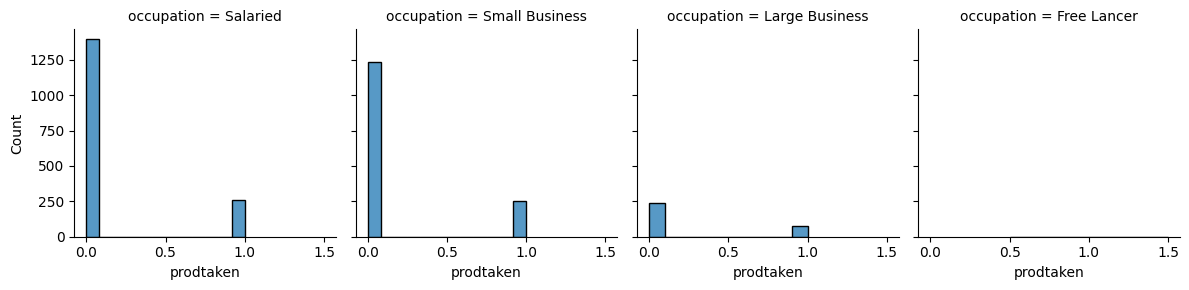

In [67]:
grid = sns.FacetGrid(df, col= "occupation")
grid.map(sns.histplot, "prodtaken")


C:\Users\laxmi\anaconda3\envs\Datascience\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


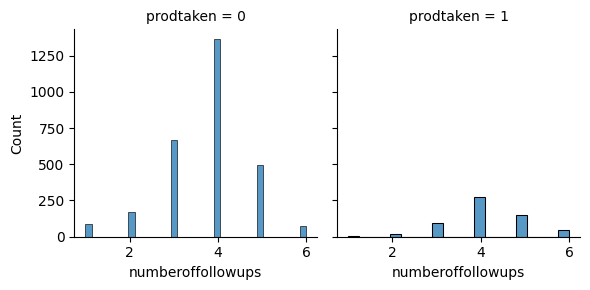

In [64]:
grid = sns.FacetGrid(df, col="prodtaken")
grid.map(sns.histplot, "numberoffollowups")

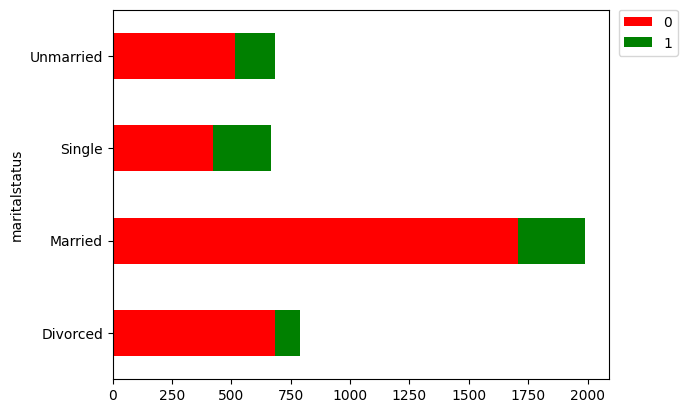

In [29]:
tab=pd.crosstab(df.maritalstatus,df.prodtaken)
tab.plot(kind='barh',stacked=True,color=['red','g'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [30]:
tab

prodtaken,0,1
maritalstatus,,
Divorced,684,105
Married,1707,283
Single,424,243
Unmarried,516,166


Text(0.5, 1.0, 'Target Vs designation')

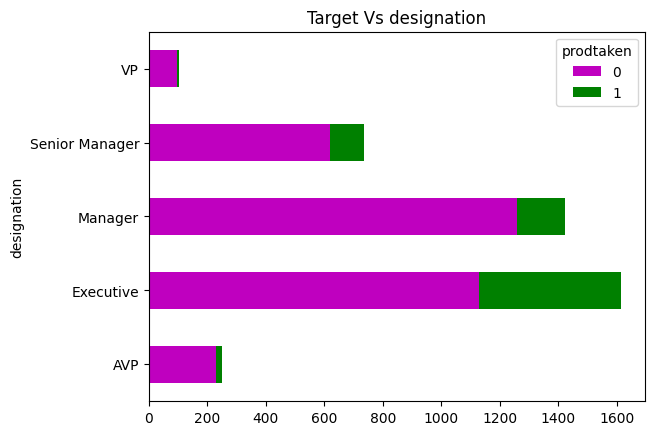

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
tab=pd.crosstab(df.designation,df.prodtaken)
tab.plot(kind='barh',stacked=True,color=['m','g'])
plt.title("Target Vs designation")

Text(0.5, 1.0, 'Target Vs passport')

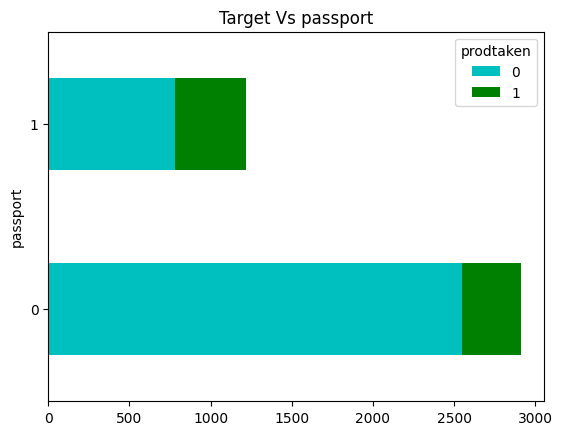

In [32]:
tab=pd.crosstab(df.passport,df.prodtaken)
tab.plot(kind='barh',stacked=True,color=['c','g'])
plt.title("Target Vs passport")

**Obaservations**😎

1. Product purchased from the customer is significantly less among the given data. Since the target variable is Prodtaken we have analyzed the data based on prodtaken with other attributes for further insights.


2. Most of the age groups are in the monthly income range of Rs.20,000/- to Rs.25,000/- Range Age Group: 33 to 40
   Monthly Income Range: Rs.20,000/- to Rs.25,000/- Preferred Products: Basic and Deluxe
   Monthly Income Range: Rs.25,000/- to Rs.30,000/- Preferred Product: Standard
   Monthly Income Range: Rs.30,000 to Rs.34,000/-  Preferred Product: Super Deluxe
   Monthly Income > Rs.34,000/- Preferred Product: King
   

4. Married Customers: Monthly Income Range: Rs.20,000/- to Rs.25,000/- Observation: More data distribution in married group
   Single Customers: Monthly Income Ranges: Rs.20,000/- to Rs.22,000/- and Rs.30,000/- to Rs.34,000/-
   

5. Most of the customers are from who taken the product are from Tier 1 city and vey less people are from tier 2 cities.


6. Most of the customers are not having passports but the customers with passpot has significantly taken the product. Most of the customers are not having passports but the customers with passpot has significantly taken the product


7. The most of the customers who has went for 2 and 3 trips has taken the product, and Most of the data is distributed between number of trips from 2 to 4.


8. Most of the customers with number of followups of 4 has taken the product.

**Insights**😎

1. We can target most of the customers from income range of Rs.20,000/- to Rs.25,000/- and premium products like king,super deluxe and deluxe for monthly income of Rs.30,000/- to Rs.35,000/-


2. We can target with customers from monthly income of Rs.20,000/- to Rs.25,000/- for basis & deluxe product, Rs.25,000/- to Rs.30,000/- to standard product, Rs.30,000 to Rs.34,000/- to Super deluxe product and >Rs.34,000/- to King Product.


3. Since married customers with monthly income of Rs.20,000 to Rs.25,000/- we can target to take basic products and since more data distribution for married customers we can recommend new wellness product to them.


4. We can recommend basic product mostly to singles for income range of Rs.20,000 to Rs.22,000/- and premier products like deluxe for monthly income range of Rs.30,000 to Rs.34,000/-


5. We can recommend the wellness product for the customers from tier1 cities rather than tier3 or tier 2 cities.


6. We can recommend the wellness product for the customers who are having passports and we can recommend the company to assist the customers for getting a passport to increase the chances of taking a product.


7. We can recommend the wellness product for the customers who are having passports and we can recommend the company to assist the customers for getting a passport to increase the chances of taking a product.


8. We can recommend the wellness product for the customers who are going for their 2nd or 3rd trip.
